In [86]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(world_readable=True,offline=False)
sns.set_style('darkgrid')

In [22]:
from datetime import datetime
print ("The Latest Update: " + str(datetime.now()))

The Latest Update: 2018-03-20 20:06:25.934872


In [23]:
tickers = ['M', 'WMT','JWN','BUZ']

s = pd.DataFrame()

for t in tickers:
    s[t] = data.DataReader(t, data_source='yahoo', start='2017-1-1')['Adj Close']

In [7]:
s.head()

M        WMT        JWN        BUZ
Date                                                  
2017-01-03  32.748280  66.533134  45.677010  26.361784
2017-01-04  33.315304  66.920738  46.923969  26.841667
2017-01-05  28.686117  67.066101  43.701065  26.752064
2017-01-06  28.648932  66.145531  43.614738  26.981054
2017-01-09  28.314295  66.581581  43.211872  27.080616

In [8]:
start = dt.datetime(2017,1,1)
end = dt.datetime(2017,7,1)

In [10]:
M = data.DataReader("M", 'yahoo', start, end)

WMT = data.DataReader("WMT", 'yahoo', start, end)

JWN = data.DataReader("JWN", 'yahoo', start, end)

BUZ = data.DataReader("BUZ", 'yahoo', start, end)

In [11]:
df = data.DataReader(['BUZ', 'WMT', 'JWN', 'M'],'yahoo', start, end)

In [12]:
tickers = ['BUZ', 'WMT', 'JWN', 'M']
sec = pd.concat([M, WMT, JWN, BUZ],axis=1,keys=tickers)
sec.columns.names = ['Ticker','Data']

In [13]:
sec.head()

Ticker            BUZ                                                        \
Data             Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2017-01-03  36.130001  36.200001  34.790001  35.230000  32.748280   9777600   
2017-01-04  35.509998  36.400002  35.480000  35.840000  33.315304   9508700   
2017-01-05  31.570000  31.850000  30.510000  30.860001  28.686117  29249100   
2017-01-06  30.820000  31.520000  30.549999  30.820000  28.648932  11484800   
2017-01-09  30.879999  30.990000  30.350000  30.459999  28.314295   9228200   

Ticker            WMT                                   ...          JWN  \
Data             Open       High        Low      Close  ...          Low   
Date                                                    ...                
2017-01-03  69.239998  69.239998  68.050003  68.660004  ...    47.299999   
2017-01-04  68.660004  69.629997  68.599998  69.059998  ...    47.750000   
2017-01-05  68.430000  69.330002  68.120003  69.209999  ...    44.020000   
2017-01-06  68.410004  68.500000  68.010002  68.260002  ...    45.150002   
2017-01-09  68.330002  68.800003  68.320000  68.709999  ...    45.009998   

Ticker                                             M                        \
Data            Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2017-01-03  47.619999  45.677010  3968100  26.430000  26.478001  26.410000   
2017-01-04  48.919998  46.923969  3781100  27.469999  27.469999  26.740000   
2017-01-05  45.560001  43.701065  7410000  26.870001  26.870001  26.870001   
2017-01-06  45.470001  43.614738  3088200  27.040001  27.100000  27.040001   
2017-01-09  45.049999  43.211872  2269500  27.200001  27.200001  27.200001   

Ticker                                   
Data            Close  Adj Close Volume  
Date                                     
2017-01-03  26.478001  26.361784   1700  
2017-01-04  26.959999  26.841667   1500  
2017-01-05  26.870001  26.752064    100  
2017-01-06  27.100000  26.981054    300  
2017-01-09  27.200001  27.080616    100  

[5 rows x 24 columns]

In [14]:
# Show maximum security Close price
sec.xs(key='Close',axis=1,level='Data').max()

Ticker
BUZ    35.840000
WMT    80.260002
JWN    50.009998
M      28.788000
dtype: float64

In [24]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick +'_Return'] = sec[tick]['Adj Close'].pct_change()

returns.dropna().head()

M_Return  WMT_Return  JWN_Return  BUZ_Return
Date                                                    
2017-01-04  0.018204    0.005826    0.027299    0.017315
2017-01-05 -0.003338    0.002172   -0.068684   -0.138951
2017-01-06  0.008560   -0.013726   -0.001975   -0.001296
2017-01-09  0.003690    0.006592   -0.009237   -0.011681
2017-01-10  0.005515   -0.006986    0.013762   -0.005253

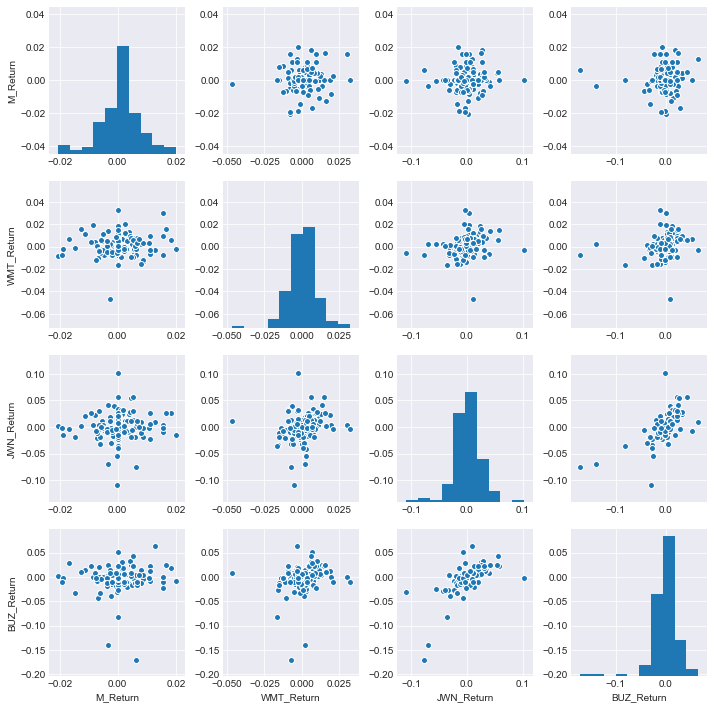

In [25]:
sns.pairplot(returns[1:]);

In [26]:
# Worst Return date
returns.idxmin()

M_Return     2017-01-12
WMT_Return   2017-06-16
JWN_Return   2017-05-12
BUZ_Return   2017-05-11
dtype: datetime64[ns]

In [27]:
returns.ix['2017-03-10':'2017-5-10'].std()

M_Return      0.005024
WMT_Return    0.005586
JWN_Return    0.018353
BUZ_Return    0.015074
dtype: float64

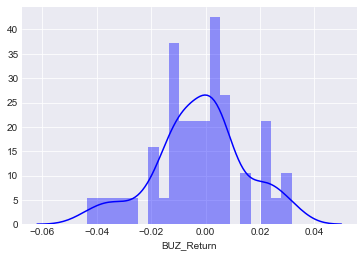

In [28]:
sns.distplot(returns.ix['2017-03-01':'2017-05-10']['BUZ_Return'],color='blue',bins=20);

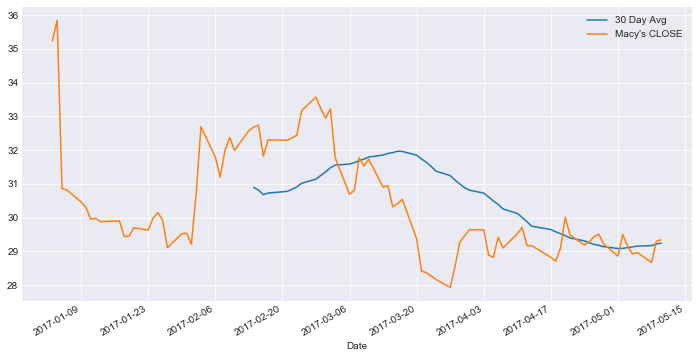

In [30]:
plt.figure(figsize=(12,6))
M['Close'].ix['2017-01-01':'2017-05-10'].rolling(window=30).mean().plot(label='30 Day Avg')
M['Close'].ix['2017-01-01':'2017-05-10'].plot(label="Macy's CLOSE")
plt.legend();

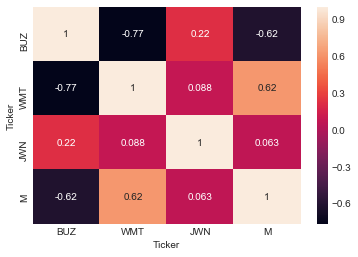

In [31]:
sns.heatmap(sec.xs(key='Close',axis=1,level='Data').corr(),annot=True);

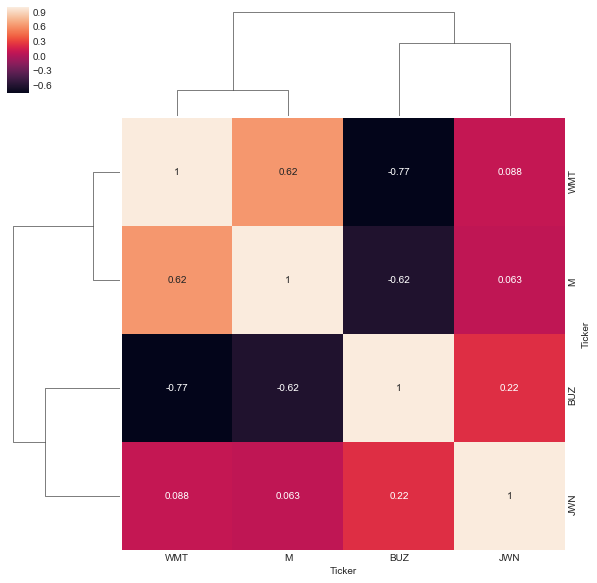

In [32]:
sns.clustermap(sec.xs(key='Close',axis=1,level='Data').corr(),annot=True);

In [34]:
close_corr = sec.xs(key='Close',axis=1,level='Data').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [36]:
# JILL- women’s apparel
jill = data.DataReader('JILL','yahoo', start = '2017 -1-1' )
jill.take([28])

Open   High    Low  Close  Adj Close  Volume
Date                                                    
2017-04-19  13.2  13.75  13.15   13.4       13.4  309300

In [37]:
jill['$_Change Open_to_Close'] = jill['Close'] - jill['Open']

jill['%_Change Open_to_Close'] = jill['$_Change Open_to_Close'] / jill['Open'] * 100

In [38]:
jill.head(3)

Open   High    Low  Close  Adj Close   Volume  \
Date                                                         
2017-03-09  12.75  12.97  12.25  12.65      12.65  9893700   
2017-03-10  12.70  13.22  12.55  12.95      12.95  1334500   
2017-03-13  12.96  13.44  12.94  13.10      13.10   567800   

            $_Change Open_to_Close  %_Change Open_to_Close  
Date                                                        
2017-03-09                   -0.10               -0.784314  
2017-03-10                    0.25                1.968504  
2017-03-13                    0.14                1.080247

In [39]:
for i in jill:
    #print(jill['Adj Close'].mean())
    mean = 13.24
print('The average value for Adj Price of JILL is',mean)

The average value for Adj Price of JILL is 13.24


In [47]:
search = jill[(jill['Volume']>= 500000)&(jill['Close']>=10)]
search.head()

Open   High    Low  Close  Adj Close   Volume  \
Date                                                         
2017-03-09  12.75  12.97  12.25  12.65      12.65  9893700   
2017-03-10  12.70  13.22  12.55  12.95      12.95  1334500   
2017-03-13  12.96  13.44  12.94  13.10      13.10   567800   
2017-03-30  13.48  13.91  13.30  13.85      13.85   625200   
2017-04-06  13.94  14.25  13.86  14.20      14.20   608300   

            $_Change Open_to_Close  %_Change Open_to_Close  
Date                                                        
2017-03-09                   -0.10               -0.784314  
2017-03-10                    0.25                1.968504  
2017-03-13                    0.14                1.080247  
2017-03-30                    0.37                2.744807  
2017-04-06                    0.26                1.865136

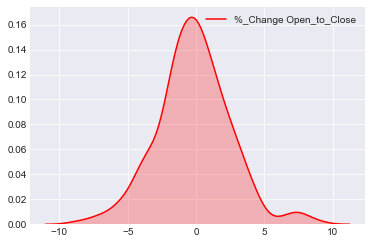

In [42]:
sns.kdeplot(jill['%_Change Open_to_Close'].dropna(),shade = True, color = 'red');

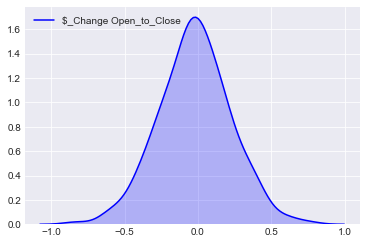

In [43]:
sns.kdeplot(jill['$_Change Open_to_Close'].dropna(), shade = True, color  = 'b');

### Strategy backtesting with tradingWithPython module

In [44]:
import tradingWithPython.lib.yahooFinance as yf
#from pandas.core import datetools
import pandas.tseries 
from tradingWithPython import sharpe
pd.options.mode.chained_assignment = None # deal with SettingWithCopyWarning in Pandas?

In [53]:
janus = data.DataReader('^JNS','yahoo')
janus.head(2)

Open        High         Low       Close   Adj Close  Volume
Date                                                                    
2015-10-20   0.0  139.210007  139.210007  139.210007  139.210007       0

In [60]:
stock_sym = ['M','JWN']

m = {symbol:data.DataReader(symbol, 'yahoo', start = '2016-01-10') for symbol in stock_sym}

In [61]:
type(m)

dict

In [62]:
# Function to create the analysis line plot
def stock_line_plot(symbol, indicator, data, ylabel):
    """Creates a line plot for basic stock symbol's indicator"""
    data[indicator].plot(legend = True, figsize = (14, 6))
    plt.title("Macy's' Adj Close price value from January 10", weight = 'bold', color = 'red')
    plt.title("%s Value for %s Along the Last Year" % (indicator, symbol), weight = 'bold')
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    
    ## Ploting the Max, Min, and Average value
    symbol_max_adj = data[indicator].max()
    symbol_min_adj = data[indicator].min()
    symbol_avg_adj = data[indicator].mean()
   
    plt.figtext(0.13, 0.85, "Max %0.2f" % symbol_max_adj)
    plt.axhline(y = symbol_max_adj, linewidth = 2, color = 'green')
    
    plt.figtext(0.13, 0.20, "Min %0.2f" % symbol_min_adj)
    plt.axhline(y = symbol_min_adj, linewidth = 2, color = 'red')
    
    plt.figtext(0.13, 0.50, "Avg %0.2f" % symbol_avg_adj)
    plt.axhline(y = symbol_avg_adj, linewidth = 2, color = 'orange', ls = '--')
    
    

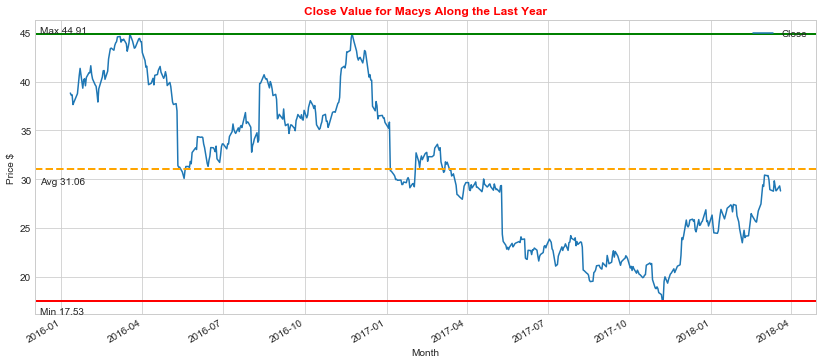

In [63]:
stock_line_plot('Macys','Close', m['M'], 'Price $')

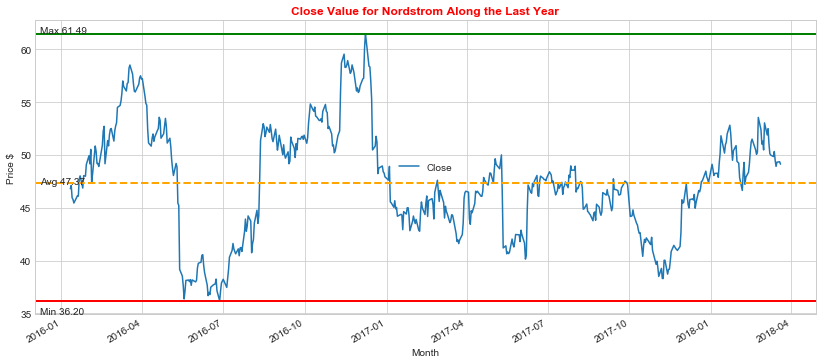

In [64]:
stock_line_plot('Nordstrom','Close', m['JWN'], 'Price $')

In [67]:
macys = data.DataReader('M','yahoo', start ='2016-01-10', end = '2017 - 05-10')
macys.head(1)

Open       High        Low  Close  Adj Close    Volume
Date                                                              
2016-01-11  37.0  38.849998  36.950001  38.82  34.683655  16934800

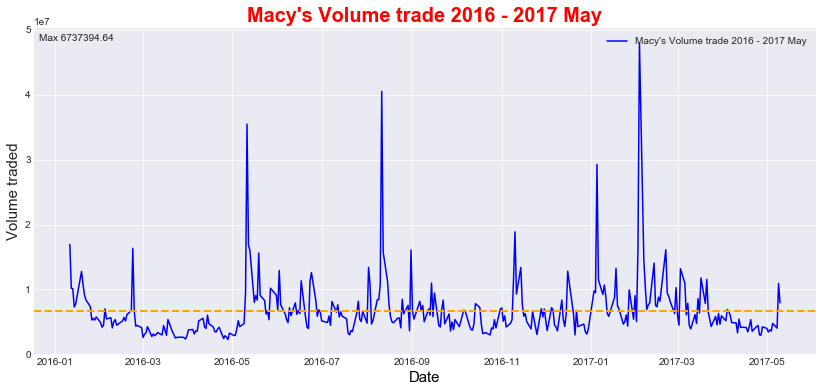

In [68]:
sns.set_style('darkgrid')
plt.figure(figsize = (14,6))
plt.plot(macys.Volume, color = 'b', ls = '-', label = "Macy's Volume trade 2016 - 2017 May")
plt.title("Macy's Volume trade 2016 - 2017 May", weight = 'bold', size = 20, color = 'r')
plt.xlabel('Date', size = 15, color = 'k')
plt.ylabel('Volume traded', size = 15)
plt.legend(loc = 1)

symbol_mean = macys['Volume'].mean()

plt.figtext(0.13, 0.85, "Max %0.2f" % symbol_mean)

plt.axhline(y = symbol_mean, linewidth = 2, color = 'orange',ls = '--' );

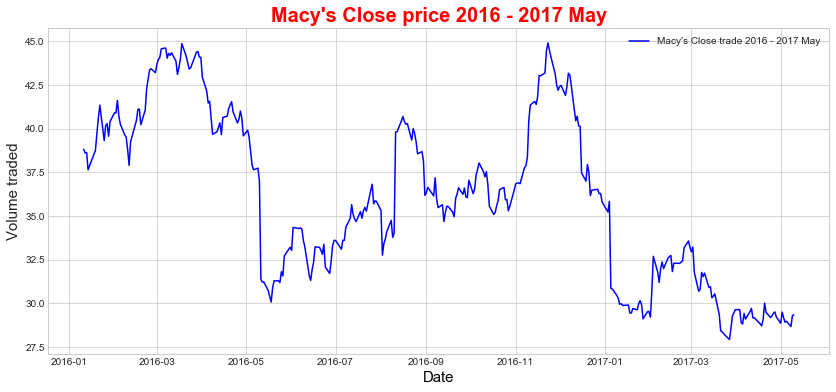

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize = (14,6))
plt.plot(macys['Close'], color = 'b', ls = '-', label = "Macy's Close trade 2016 - 2017 May")
plt.title("Macy's Close price 2016 - 2017 May", weight = 'bold', size = 20, color = 'r')
plt.xlabel('Date', size = 15, color = 'k')
plt.ylabel('Volume traded', size = 15)
plt.legend(loc = 1);

In [74]:
#The two companies  Close Comparison
# Create a new data frame for closing stocks values only
close_price = data.DataReader(['M','JWN'], 'yahoo', start, end)['Adj Close']

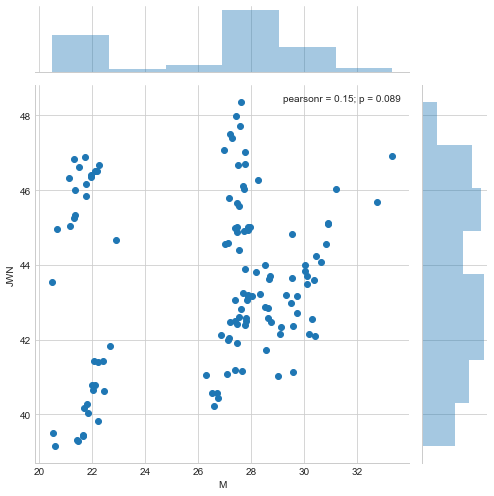

In [75]:
sns.jointplot(x = 'M', y = 'JWN', data = close_price, size = 7);

In [76]:
def daily_return(data, indicator):
    data['Daily Return'] = data[indicator].pct_change()

daily_return(m['JWN'], 'Adj Close')

In [77]:
daily_ret = m['JWN'].pct_change()['Close'];daily_ret.dropna().head()

Date
2016-01-12    0.006622
2016-01-13   -0.024830
2016-01-14   -0.003482
2016-01-15   -0.007425
2016-01-19    0.015181
Name: Close, dtype: float64

Text(0.5,1,'Daily Return on Nordstrom')

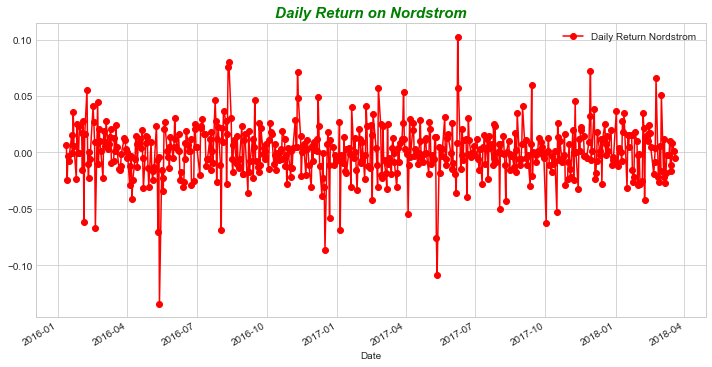

In [78]:
daily_ret.plot(figsize = (12,6),color = 'red', marker = 'o',label = 'Daily Return Nordstrom')
plt.legend()
plt.title('Daily Return on Nordstrom', color = 'green', weight = 'bold',style = 'italic', size = 15)

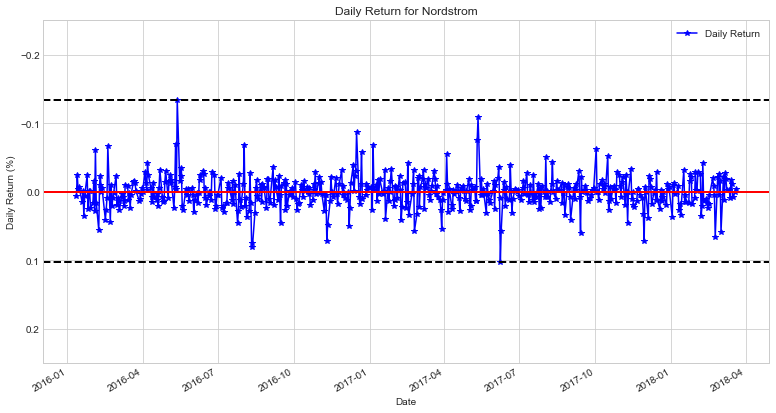

In [79]:
def return_JWN(data, indicator, stock):
    symbol_avg_adj = data[indicator].mean()
    symbol_max_adj = data[indicator].max()
    symbol_min_adj = data[indicator].min() 
    data[indicator].plot(figsize = (13, 7), legend = True, linestyle = '-', marker = '*', color ='b')
    plt.ylim(0.25,-0.25)
    plt.axhline(y = symbol_avg_adj, linewidth = 2, color = 'red')
    plt.axhline(y = symbol_max_adj, linewidth = 2, color = 'k', linestyle ='--')
    plt.axhline(y = symbol_min_adj, linewidth = 2, color = 'k', linestyle ='--')
    plt.grid(True)
    plt.title("Daily Return for %s" % stock)
    plt.ylabel("Daily Return (%)")
return_JWN(m['JWN'],'Daily Return', 'Nordstrom')

In [82]:
# Create a new data frame only with the closing information
cl = data.DataReader(stock_sym, 'yahoo', start, end)['Adj Close']
cl.head()

JWN          M
Date                            
2017-06-30  46.662270  22.233232
2017-06-29  46.398865  21.955795
2017-06-28  46.515930  22.175831
2017-06-27  46.506172  22.089731
2017-06-26  46.633003  21.496588

In [83]:
# Create another data frame with the daily return of each stock symbol
stock_returns = cl.pct_change()
stock_returns.dropna().head(2)

JWN         M
Date                          
2017-06-29 -0.005645 -0.012478
2017-06-28  0.002523  0.010022

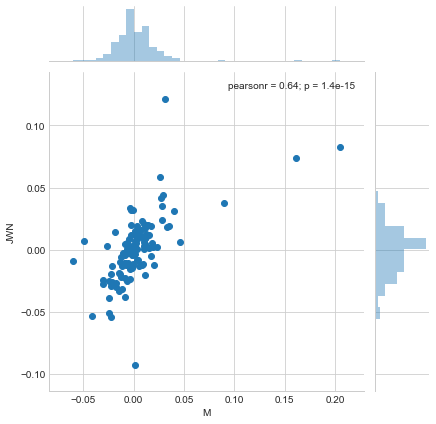

In [85]:
# Now I compare the daiyl percentage of return of the two stocks to check how correlated.
sns.jointplot('M', 'JWN', stock_returns, kind = 'scatter');

In [87]:
macys.iplot()

In [88]:
stock_returns.iplot(title="Nordstrom v. Macy's Returns",
         xTitle='Date', yTitle='Return')

In [89]:
tickers = ['M', 'JWN','WMT']

lux = pd.DataFrame()

for t in tickers:
    lux[t] = data.DataReader(t, data_source='yahoo', start='2016-10-1')['Adj Close']

In [90]:
lux['M'].iplot(bestfit=True,color = 'blue')

In [92]:
lux['JWN'].iplot(bestfit=True,color = 'green')

In [93]:
lux['WMT'].iplot(bestfit=True,color = 'red')